<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/AproriVsFpGrowthRunTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fp Growth

In [4]:
pip install pyfpgrowth

In [5]:
import pyfpgrowth

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BreastCancer_Dataset1202/breast_train_transactions.txt', header = None, sep="," , names=['a','b','c', 'd', 'e', 'f','g', 'h', 'i', 'k'])

In [7]:
df.head(5)

,a,b,c,d,e,f,g,h,i,k
0,class@no,a1@30-39,a2@premeno,a3@30-34,a4@0-2,a5@no,a6@3,a7@left,a8@left_low,a9@no
1,class@no,a1@40-49,a2@premeno,a3@20-24,a4@0-2,a5@no,a6@2,a7@right,a8@right_up,a9@no
2,class@no,a1@40-49,a2@premeno,a3@20-24,a4@0-2,a5@no,a6@2,a7@left,a8@left_low,a9@no
3,class@no,a1@60-69,a2@ge40,a3@15-19,a4@0-2,a5@no,a6@2,a7@right,a8@left_up,a9@no
4,class@no,a1@40-49,a2@premeno,a3@0-4,a4@0-2,a5@no,a6@2,a7@right,a8@right_low,a9@no


In [8]:
trans = df.values.tolist()

In [9]:
patterns = pyfpgrowth.find_frequent_patterns(trans, .01)

In [10]:
min_sup = [ .01, .02,.03,.04, .05,.06,.07,.08,.09, .1, .2, .5, .6]

In [11]:
import time
run_time_fp = []
for i in min_sup:
    print(i)
    start_time = time.time()
    patterns = pyfpgrowth.find_frequent_patterns(trans, i)
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_fp.append(time.time() - start_time)
  
run_time_fp

0.01
For 0--- 1.4078245162963867 seconds ---
0.02
For 0--- 1.1184546947479248 seconds ---
0.03
For 0--- 1.2253034114837646 seconds ---
0.04
For 0--- 1.1287918090820312 seconds ---
0.05
For 0--- 1.1088080406188965 seconds ---
0.06
For 0--- 0.9682514667510986 seconds ---
0.07
For 0--- 1.023705244064331 seconds ---
0.08
For 0--- 0.9400098323822021 seconds ---
0.09
For 0--- 1.0234375 seconds ---
0.1
For 0--- 0.9477245807647705 seconds ---
0.2
For 0--- 1.0142359733581543 seconds ---
0.5
For 0--- 0.9693470001220703 seconds ---
0.6
For 0--- 1.0510907173156738 seconds ---


[1.407996416091919,
 1.1186096668243408,
 1.225496530532837,
 1.1289763450622559,
 1.109330177307129,
 0.9684243202209473,
 1.0241918563842773,
 0.9404604434967041,
 1.0239062309265137,
 0.9482018947601318,
 1.014683723449707,
 0.9697995185852051,
 1.0515031814575195]

Apriori

In [12]:
pip install apriori_python

In [13]:
from apriori_python import apriori

In [14]:
min_sup = [.01, .02,.03,.04, .05,.06,.07,.08,.09, .1, .2, .5, .6]
import time
run_time_apr = []
for i in min_sup:
    print(i)
    start_time = time.time()
    freqItemSet, rules = apriori(trans, minSup=i, minConf=0.5)
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_apr.append(time.time() - start_time)
  
run_time_apr

0.01
For 0--- 84.47917222976685 seconds ---
0.02
For 0--- 15.840943574905396 seconds ---
0.03
For 0--- 3.956165075302124 seconds ---
0.04
For 0--- 2.1765360832214355 seconds ---
0.05
For 0--- 1.2895915508270264 seconds ---
0.06
For 0--- 0.7615444660186768 seconds ---
0.07
For 0--- 0.5106945037841797 seconds ---
0.08
For 0--- 0.41762495040893555 seconds ---
0.09
For 0--- 0.28185176849365234 seconds ---
0.1
For 0--- 0.23801827430725098 seconds ---
0.2
For 0--- 0.0571446418762207 seconds ---
0.5
For 0--- 0.010422706604003906 seconds ---
0.6
For 0--- 0.007788658142089844 seconds ---


[84.47935795783997,
 15.8414306640625,
 3.9566612243652344,
 2.176718235015869,
 1.2900769710540771,
 0.7619831562042236,
 0.5108580589294434,
 0.4177885055541992,
 0.28200840950012207,
 0.2384803295135498,
 0.057288408279418945,
 0.010545492172241211,
 0.007886886596679688]

ECLAT

In [19]:
pip install pyECLAT

In [20]:
import pyECLAT
from pyECLAT import ECLAT

In [23]:
dataframe = pd.read_csv('/content/drive/MyDrive/BreastCancer_Dataset1202/breast_train_transactions.txt', header = None, sep=",")

In [24]:
model2= ECLAT(data=dataframe,verbose=True)

100%|██████████| 44/44 [00:00<00:00, 2017.33it/s]


In [25]:
fre_itemsets= model2.fit( min_support=0.1,max_combination=3)

9it [00:00, 82.85it/s]

Combination 1 by 1


27it [00:00, 85.18it/s]
11it [00:00, 103.63it/s]

Combination 2 by 2


351it [00:03, 113.89it/s]
11it [00:00, 109.52it/s]

Combination 3 by 3


2925it [00:21, 135.75it/s]


In [30]:
min_sup = [.01, .02,.03,.04, .05,.06,.07,.08,.09, .1, .2, .5, .6]
import time
run_time_eclat = []
for i in min_sup:
    print(i)
    start_time = time.time()
    fre_itemsets= model2.fit(min_support=i,max_combination=2)
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_eclat.append(time.time() - start_time)
  
run_time_eclat

13it [00:00, 56.01it/s]

0.01
Combination 1 by 1


41it [00:00, 76.60it/s]
12it [00:00, 109.34it/s]

Combination 2 by 2


820it [00:07, 104.37it/s]
9it [00:00, 89.34it/s]

For 0--- 8.422324180603027 seconds ---
0.02
Combination 1 by 1


38it [00:00, 90.81it/s]
11it [00:00, 103.49it/s]

Combination 2 by 2


703it [00:06, 106.91it/s]
9it [00:00, 83.58it/s]

For 0--- 7.035147666931152 seconds ---
0.03
Combination 1 by 1


32it [00:00, 90.50it/s]
21it [00:00, 98.73it/s] 

Combination 2 by 2


496it [00:05, 97.98it/s] 
10it [00:00, 97.02it/s]

For 0--- 5.44096827507019 seconds ---
0.04
Combination 1 by 1


32it [00:00, 94.37it/s]
21it [00:00, 98.19it/s] 

Combination 2 by 2


496it [00:04, 103.15it/s]
18it [00:00, 85.78it/s]

For 0--- 5.182072877883911 seconds ---
0.05
Combination 1 by 1


31it [00:00, 84.77it/s]
11it [00:00, 102.10it/s]

Combination 2 by 2


465it [00:04, 103.97it/s]
10it [00:00, 93.49it/s]

For 0--- 4.878986597061157 seconds ---
0.06
Combination 1 by 1


31it [00:00, 90.63it/s]
12it [00:00, 118.03it/s]

Combination 2 by 2


465it [00:04, 110.29it/s]
9it [00:00, 88.85it/s]

For 0--- 4.585627317428589 seconds ---
0.07
Combination 1 by 1


29it [00:00, 83.14it/s]
11it [00:00, 106.19it/s]

Combination 2 by 2


406it [00:03, 106.22it/s]
9it [00:00, 85.29it/s]

For 0--- 4.201730966567993 seconds ---
0.08
Combination 1 by 1


27it [00:00, 82.75it/s]
11it [00:00, 105.56it/s]

Combination 2 by 2


351it [00:03, 104.95it/s]
9it [00:00, 88.04it/s]

For 0--- 3.7100744247436523 seconds ---
0.09
Combination 1 by 1


27it [00:00, 85.13it/s]
12it [00:00, 113.37it/s]

Combination 2 by 2


351it [00:03, 108.10it/s]
9it [00:00, 87.76it/s]

For 0--- 3.6054327487945557 seconds ---
0.1
Combination 1 by 1


27it [00:00, 87.85it/s]
25it [00:00, 118.44it/s]

Combination 2 by 2


351it [00:03, 111.30it/s]
10it [00:00, 94.74it/s]

For 0--- 3.5022614002227783 seconds ---
0.2
Combination 1 by 1


19it [00:00, 90.85it/s]
13it [00:00, 123.32it/s]

Combination 2 by 2


171it [00:01, 122.08it/s]
6it [00:00, 95.18it/s]
13it [00:00, 123.63it/s]

For 0--- 1.6416783332824707 seconds ---
0.5
Combination 1 by 1
Combination 2 by 2


15it [00:00, 121.59it/s]
4it [00:00, 97.06it/s]
6it [00:00, 110.05it/s]

For 0--- 0.21194815635681152 seconds ---
0.6
Combination 1 by 1
Combination 2 by 2
For 0--- 0.12212157249450684 seconds ---


[8.422364234924316,
 7.035531759262085,
 5.4410178661346436,
 5.182131052017212,
 4.879045486450195,
 4.585872173309326,
 4.201788425445557,
 3.7104458808898926,
 3.60548734664917,
 3.502305746078491,
 1.6420445442199707,
 0.21229815483093262,
 0.12215447425842285]

In [35]:
#plot it
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
df = pd.DataFrame({'Fp_Growth': run_time_fp, 'Apriori' :run_time_apr, 'ECLAT': run_time_eclat })

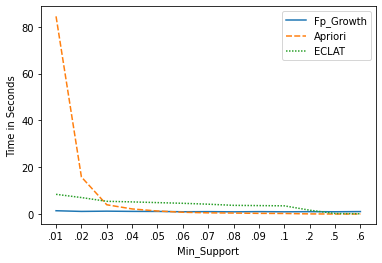

In [36]:
g = sns.lineplot(data=df)
g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels(['.01', '.02','.03','.04', '.05','.06','.07','.08','.09', '.1', '.2', '.5', '.6'])
g.set(xlabel='Min_Support', ylabel='Time in Seconds')
plt.savefig("Run time performance")